오토인코더는 원본 이미지 벡터의 차원을 축소하여 은닉 레이어에 주요 특징을 추출한다.(인코더)

은닉 레이어에 추출된 핵심 정보만을 학습하여 최대한 원본 이미지와 비슷하게 복원한 이미지를 출력한다(디코더)

원본 이미지를 정답으로 생각하고, 원본 이미지의 주요 특징만을 가지고 최대한 원본 이미지와 가까운 이미지를 찾는다.

주요 특징이 추출되어 핵심 정보만을 담고 있는 은닉 레이어를 사용하면, 원본 이미지가 가지고 있는 정보를 충분히 설명할 수 있다.

인코더와 디코더의 아키텍처를 바꾸면 오토인코더의 성능을 개선할 수 있다

오토인코더를 사용하면, 원본 이미지가 가지고 있는 불필요한 정보나 노이즈를 분리하여 제거 가능!!

In [2]:
#오토인코더 모델 만들기

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
#케라스에서 불러오기
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#피처 스케일링 - 데이터 정규화를 통해 모든 픽셀의 데이터를 0~1 범위로
X_train = X_train /255.
X_test = X_test / 255.

#차원 추가 (채널 추가)
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
#오토 인코더 모델 정의:

def Autoencoder():
  model = Sequential()

  #Encoder 부분
  #합성곱 신경망 적용
  model.add(Conv2D(filters=16, kernel_size=(3,3),
                   activation = 'relu', input_shape=[28,28,1]))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  #28 * 28 =784개의 파라미터가 인코더의 마지막 층인 Dense레이어의 유닛 수인 64개로 축소된다
  model.add(Dense(64, activation ='relu'))

  #Decoder
  #출력 유닛 수는 입력과 동일한 784개로 설정
  model.add(Dense(units=28*28, activation = 'sigmoid'))
  model.add(Reshape((28,28))) #원래 형태로 변환

  #Compile
  model.compile(optimizer='adam',
                loss='mean_squared_error')
  return model
ae_model = Autoencoder()
ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 64)                173120    
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                        

In [5]:
#학습
history = ae_model.fit(X_train, X_train, batch_size = 64, epochs = 20,
                       validation_data= (X_test, X_test),
                       verbose = 0)


ae_images = ae_model.predict(X_test)
ae_images.shape

313/313 [==============================] - 2s 6ms/step


(10000, 28, 28)

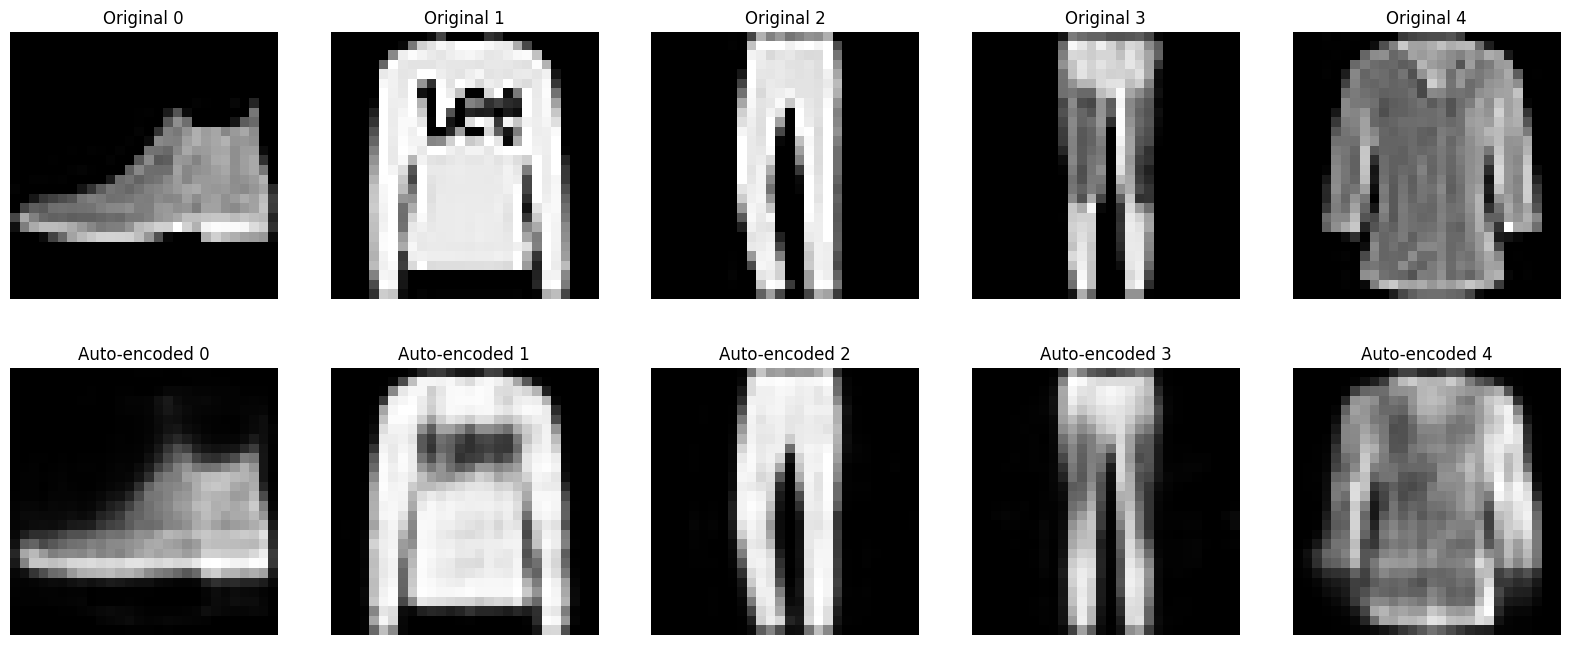

In [7]:
#테스트 데이터에서 5개의 이미지를 추출하여 원본 이미지와 복원한 이미지를 출력하여 비교해보자

num = 5
plt.figure(figsize=(20,8))

for i in range(num):
  #원본 이미지
  ax = plt.subplot(2, num, i+1)
  plt.imshow(X_test[i].reshape((28,28)), cmap='gray')
  plt.title("Original %s"%str(i))
  plt.axis('off')

  #복원 이미지
  ax = plt.subplot(2,num,i+num+1)
  plt.imshow(ae_images[i], cmap = 'gray')
  plt.title("Auto-encoded %s"%str(i))
  plt.axis('off')
plt.show()
